In [1]:
#MLR-Startup

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot as ip
import statsmodels.formula.api as smf
import statsmodels.api as sma


In [26]:
startup = pd.read_csv("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\\Multi Linear Regression\\50_Startups.csv")

In [122]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [28]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [29]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [30]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


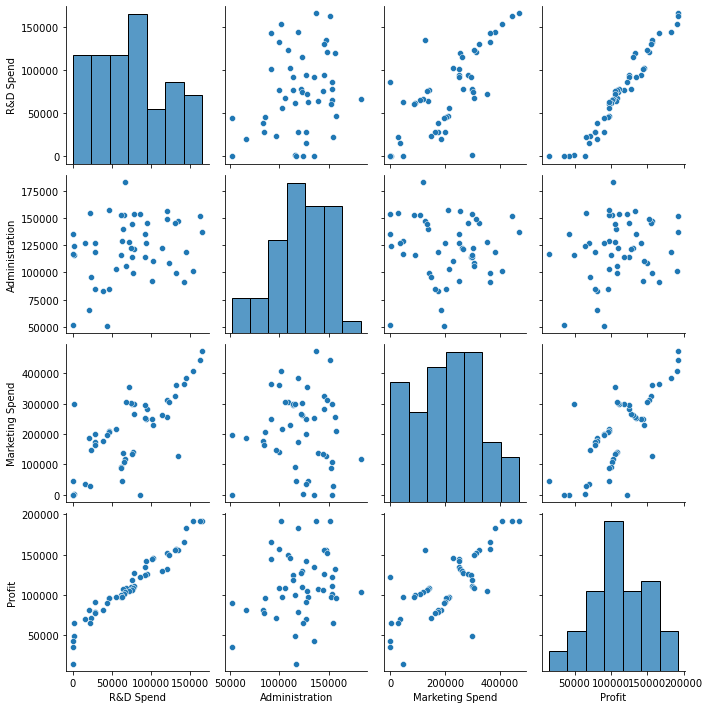

In [31]:
sns.pairplot(startup)

In [32]:
startup1=startup.drop(["State"],axis=1)
startup1=startup1.rename(columns={"R&D Spend":"rnd","Marketing Spend":"marketing"})

In [35]:
model=smf.ols("Profit~startup.iloc[:,0]+startup.iloc[:,1]+startup.iloc[:,2]",data=startup1).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           4.53e-30
Time:                        13:01:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
startup.iloc[:, 0]     0.8057      0.045     17.846      0.000       0.715       0.897
startup.iloc[:, 1]    -0.0268      0.051     -0.526      0.602      -0.130       0.076
startup.iloc[:, 2]     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#VIF

In [45]:
rs_rd=smf.ols("startup1.iloc[:,0]~startup1.iloc[:,1]+startup.iloc[:,2]",data=startup1).fit().rsquared
vif_rd=1/(1-(rs_rd))
rs_ad=smf.ols("startup1.iloc[:,1]~startup1.iloc[:,0]+startup.iloc[:,2]",data=startup1).fit().rsquared
vif_ad=1/(1-(rs_ad))
rs_ma=smf.ols("startup1.iloc[:,2]~startup1.iloc[:,0]+startup.iloc[:,1]",data=startup1).fit().rsquared
vif_ma=1/(1-(rs_ma))

In [50]:
#storing value of VIF in Dataframe
d1={'Variable':['rdspend','administration','marketing'],'VIF':[vif_rd,vif_ad,vif_ma]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variable,VIF
0,rdspend,2.468903
1,administration,1.175091
2,marketing,2.326773


In [52]:
m1=smf.ols("startup1.iloc[:,3]~startup1.iloc[:,1]+startup.iloc[:,2]",data=startup1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     startup1.iloc[:, 3]   R-squared:                       0.610
Model:                             OLS   Adj. R-squared:                  0.593
Method:                  Least Squares   F-statistic:                     36.71
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):           2.50e-10
Time:                         13:25:43   Log-Likelihood:                -577.13
No. Observations:                   50   AIC:                             1160.
Df Residuals:                       47   BIC:                             1166.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
startup1.iloc[:, 1]     0.3237      0.131      2.468      0.017       0.060       0.588
startup.iloc[:, 2]      0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
m2=smf.ols("startup1.iloc[:,3]~startup1.iloc[:,1]+startup.iloc[:,2]",data=startup1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     startup1.iloc[:, 3]   R-squared:                       0.559
Model:                             OLS   Adj. R-squared:                  0.550
Method:                  Least Squares   F-statistic:                     60.88
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):           4.38e-10
Time:                         13:27:36   Log-Likelihood:                -580.18
No. Observations:                   50   AIC:                             1164.
Df Residuals:                       48   BIC:                             1168.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept               6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
startup.iloc[:, 2]     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
m3=smf.ols("startup1.iloc[:,3]~startup1.iloc[:,1]",data=startup1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     startup1.iloc[:, 3]   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     2.015
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):              0.162
Time:                         13:28:29   Log-Likelihood:                -599.63
No. Observations:                   50   AIC:                             1203.
Df Residuals:                       48   BIC:                             1207.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
startup1.iloc[:, 1]     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

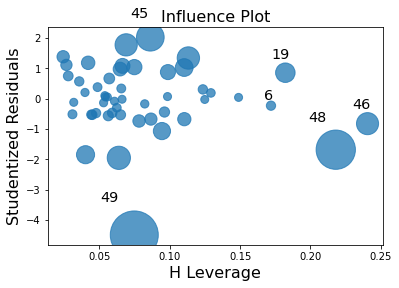

In [83]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [80]:
#Influence Plot
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.24

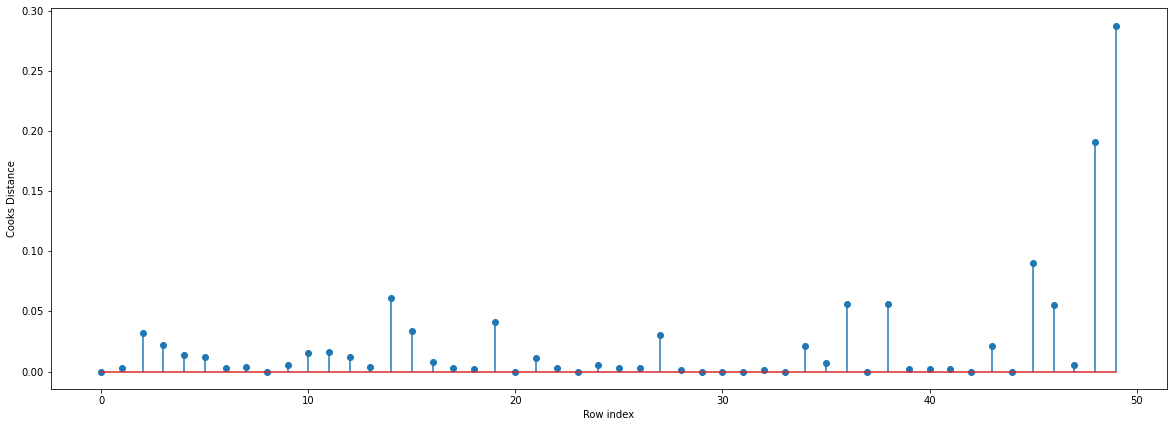

In [84]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [86]:
startup2=startup1.drop(startup1.index[[49]],axis=0).reset_index()

In [87]:
startup2

,index,rnd,marketing,Profit
0,0,165349.20,471784.10,192261.83
1,1,162597.70,443898.53,191792.06
2,2,153441.51,407934.54,191050.39
3,3,144372.41,383199.62,182901.99
4,4,142107.34,366168.42,166187.94
5,5,131876.90,362861.36,156991.12
6,6,134615.46,127716.82,156122.51
7,7,130298.13,323876.68,155752.60
8,8,120542.52,311613.29,152211.77
9,9,123334.88,304981.62,149759.96


In [92]:
startup3=startup2.drop(['index'],axis=1)

In [90]:
startup3

,rnd,marketing,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [137]:
fmodel = smf.ols('startup3.iloc[:,2]~startup3.iloc[:,0]+startup3.iloc[:,1]',data=startup3).fit()

In [138]:
fmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     startup3.iloc[:, 2]   R-squared:                       0.961
Model:                             OLS   Adj. R-squared:                  0.959
Method:                  Least Squares   F-statistic:                     568.0
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):           3.74e-33
Time:                         15:19:20   Log-Likelihood:                -506.43
No. Observations:                   49   AIC:                             1019.
Df Residuals:                       46   BIC:                             1025.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
startup3.iloc[:, 0]     0.7754      0.035     22.136      0.000       0.705       0.846
startup3.iloc[:, 1]     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
#Profit=49790+ 0.8(RD Spend) + 0.03(Marketing Spend)

In [147]:
# split the data into train and test

from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(startup3,test_size=0.2)

In [148]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))
  
def MAPE(pred,actual):
      return np.mean((np.abs(actual-pred)/actual))*100

In [149]:
#train the model using training data
train_model=smf.ols('Profit~rnd+marketing',data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Profit
errors_train=predtrain-actualtrain
mape_train=MAPE(predtrain,actualtrain)
mape_train

6.148284922954758

In [150]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit

mape_test=MAPE(predtest,actualtest)
mape_test

6.56290644101361